# Weekly assignment 5

In this exercise, I am using the [data set on student alcohol consumption](https://www.kaggle.com/uciml/student-alcohol-consumption) to predict predict the variable 'in a romantic relationship'. I selected the data set because I find it interesting to see if such variables can be used to predict the relationship status. 

In [1]:
import sklearn as sk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

## Importing the data ##

Let's have a look at the data first.

In [2]:
df_all = pd.read_csv('student-por.csv')
df_all.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


First, I make a sub set of the data frame including variables that I consider interesting to investigate. The data consists of a number of variables (33 in total) of which I chose 7 to predict if the respondent is in a romantic relationship.

In [3]:
df = df_all[['romantic','age', 'Pstatus', 'studytime', 'activities', 'famrel', 'goout', 'Walc']]
df.head()

,romantic,age,Pstatus,studytime,activities,famrel,goout,Walc
0,no,18,A,2,no,4,4,1
1,no,17,T,2,no,5,3,1
2,no,15,T,2,no,4,2,3
3,yes,15,T,3,yes,3,2,1
4,no,16,T,2,no,4,2,2


As we see the parental status and actitivites are not numeric and hence need to be turned into dummy variables. 

In [4]:
dummies = pd.get_dummies(df['Pstatus'])
dummies.head(1)
df = pd.concat([df, dummies], axis=1) #the axis=1 means: add it to the columns (axis=0 is rows)
df.head(1)

,romantic,age,Pstatus,studytime,activities,famrel,goout,Walc,A,T
0,no,18,A,2,no,4,4,1,1,0


In [5]:
dummies = pd.get_dummies(df['activities'])
dummies.head(1)

,no,yes
0,1,0


In [6]:
df = pd.concat([df, dummies], axis=1) #the axis=1 means: add it to the columns (axis=0 is rows)
df.head(1)

,romantic,age,Pstatus,studytime,activities,famrel,goout,Walc,A,T,no,yes
0,no,18,A,2,no,4,4,1,1,0,1,0


I choose the variables sex, age, parent's cohabitation status, studytime, activities, quality of family relationship, going out and weekly alcohol consumption as X variables. When going through the list I found these variables had a chance of influncing the relationship status. This goes from the hypothesis that if a person is older, he/she might be more likely to have a relationship. I further want to see if the parental cohabitiation and family relationship can have a positive relationship with the 'romantic' variable. Lastly, I expect going out and Weekend alcohol consumption to have a negativive relationship with the predicted variable. 
(The T stands for the dummy variable parents are together and yes for doing extra curricular activities.)


I am predicting *romantic*: if there is a romantic relationship (1) or not (0). 

Let's get our *X* and *y* and split the data.




In [15]:
X = df[['age', 'T', 'studytime', 'yes', 'famrel', 'goout', 'Walc']] #do I need double brackets?
y = df['romantic']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Training the algorithm
Because I am not very familiar with Random Forest yet, I first wanted to try out the K-nearest neighbour algorithms and see what solution I get. 

## K-nn

In [19]:
from sklearn.neighbors import KNeighborsClassifier #the object class we need

knn = KNeighborsClassifier(n_neighbors=5) #create a KNN-classifier with 5 neighbors (default)
knn = knn.fit(X_train, y_train) #this fits the k-nearest neigbor model with the train data
knn.score(X_test, y_test) #calculate the fit on the test data

0.6153846153846154

61% of relationships are accurately predicted. I assume that is not a fantastic result but at any case better than 50%. 

In [9]:
from sklearn.metrics import confusion_matrix
y_test_pred = knn.predict(X_test) #the predicted values
cm = confusion_matrix(y_test, y_test_pred) #creates a "confusion matrix"
cm

array([[99, 29],
       [46, 21]], dtype=int64)

The recall and precision for this are:

$recall = \frac{100}{100 + 28} = 0.78125$

$precision = \frac{100}{100 + 46} = 0.68493150684$

(After re-running the data set the numbers were slighty different)

## Random Forest

Let's train the Random Forest algorithm. RF uses randomness, so we need to set a *random_state* if we want the result to be stable for presentation purposes.

I've also set the number of trees (*n_estimators*) to 100. This will become the default number of trees in the future of the *sklearn* package, since current literature suggests using more trees than was used traditionally (10). Also, computing power has increased (more trees require more computing power). The following might take half a minute or so to run, depending on your machine. (Text by Jonas)

In [10]:
rf = RandomForestClassifier(random_state=1, n_estimators=100) #RF is a random algorithm, so to get the same results we need to use random_state
rf = rf.fit(X_train, y_train)

In my understanding Random Forest makes use of many decision trees and uses the outcome of these to make a more accurate prediction. 

## Evaluating the model ##

Let's evaluate the model using our standard approach for a *classification* problem: making a confusion matrix and calculating accuracy, precision and recall.

The confusion matrix uses the *sorted* labels, so 0 comes first, 1 second.

In [11]:
y_pred = rf.predict(X_test) #the predicted values
cm = confusion_matrix(y_test, y_pred) #creates a "confusion matrix"
cm = pd.DataFrame(cm, index=['no relationship (actual)', 'relationship (actual)'], columns = ['no relationship (pred)', 'relationship (pred)']) #label and make df
cm

,no relationship (pred),relationship (pred)
no relationship (actual),100,28
relationship (actual),46,21


As we can see from the confusion matrix, no relationship is detected reasonably well. 
Let's analyze the confusion matrix. 
The algorithm correctly predicted 100 cases of no romantic relationship and falsely predicted 46 people that were in a relationship to not be in a relationship. 

On the other hand it correctly predicted 21 to be in a relationship, however 28 people that are in a relationship were predicted to not in a relationship.

To calculate some numbers I am using a function called *classification_report*.

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.68      0.78      0.73       128
         yes       0.43      0.31      0.36        67

    accuracy                           0.62       195
   macro avg       0.56      0.55      0.55       195
weighted avg       0.60      0.62      0.60       195



The precision for fraud is alright: about 43% of the suspected relationships turn out not to be in a relationship.

The recall is acceptable, but a bit low. We still miss about 31% of the relationship cases.

These results are very similar to the outcomes of te knn algorithm, which makes me believe that it is right. Perhaps choosing other variables could improve the precision of the algorithm. 

## Making use of probabilities ##

We saw that recall is probably the most important measure in this case. We also saw that there is a trade-off between precision and recall. So can we improve recall at the expense of precision?

Yes, it turns out we can. What actually happens "under the hood" of the algorithm, is that a probability is calculated. The algorithm then classifies cases according to this probability. The standard setting is to select the outcome with the highest probability. But, we can also work with the probabilities themselves.

Let's get the probabilities using *predict_proba*. Note that I'm using the first RF model again. (Text by Jonas) 

In [13]:
y_pred_prob = rf.predict_proba(X_test) #Instead of classes, we now get the probabilities
y_pred_prob


array([[0.20416667, 0.79583333],
       [0.24      , 0.76      ],
       [0.63214286, 0.36785714],
       [0.26833333, 0.73166667],
       [0.59      , 0.41      ],
       [0.98      , 0.02      ],
       [0.6925    , 0.3075    ],
       [0.81402381, 0.18597619],
       [0.96      , 0.04      ],
       [0.74333333, 0.25666667],
       [0.94      , 0.06      ],
       [0.66516667, 0.33483333],
       [0.16      , 0.84      ],
       [0.62      , 0.38      ],
       [0.481     , 0.519     ],
       [0.36      , 0.64      ],
       [0.96166667, 0.03833333],
       [0.64469048, 0.35530952],
       [0.845     , 0.155     ],
       [0.266     , 0.734     ],
       [0.95666667, 0.04333333],
       [0.45      , 0.55      ],
       [0.54783333, 0.45216667],
       [0.7135    , 0.2865    ],
       [0.89      , 0.11      ],
       [0.55833333, 0.44166667],
       [0.89      , 0.11      ],
       [0.8675    , 0.1325    ],
       [0.7625    , 0.2375    ],
       [0.845     , 0.155     ],
       [0.

This is a two-dimensional array, with probabilities for no-relationship (first number) and relationship (second number). Let's visualize the probabilities to see.

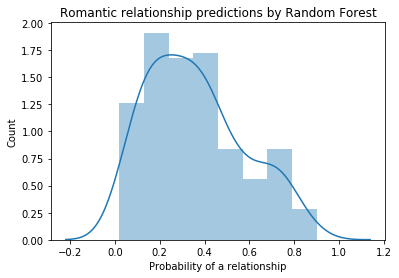

In [14]:
fraud_prob = y_pred_prob[:,1] #this subsets the second column (fraud)
sns.distplot(fraud_prob)
plt.xlabel("Probability of a relationship")
plt.ylabel("Count")
plt.title("Romantic relationship predictions by Random Forest")
plt.show()

I am not quite sure what this graph means, to be honest but I thought I would add it either way. 